In [1]:
import fastf1 as ff1


In [2]:
ff1.Cache.enable_cache('cache')


In [3]:
YEAR = 2022
RACE = 'Saudi Arabia'
SESSION = 'R'

session = ff1.get_session(YEAR, RACE, SESSION)


In [4]:
session.load()


core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching tra

In [8]:
laps = session.laps

laps.pick_fastest()


Time                      0 days 02:23:43.906000
DriverNumber                                  16
LapTime                   0 days 00:01:31.634000
LapNumber                                   48.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:33.774000
Sector2Time               0 days 00:00:29.148000
Sector3Time               0 days 00:00:28.712000
Sector1SessionTime        0 days 02:22:46.046000
Sector2SessionTime        0 days 02:23:15.194000
Sector3SessionTime        0 days 02:23:43.906000
SpeedI1                                    281.0
SpeedI2                                    313.0
SpeedFL                                    291.0
SpeedST                                    317.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife                                    32.0
FreshTyre                                   True
Stint               

In [35]:
driver_1, driver_2 = 'VER', 'LEC'

ver_laps = laps.pick_driver(driver_1)
lec_laps = laps.pick_driver(driver_2)

lec_fastest = lec_laps.pick_fastest()
ver_fastest = ver_laps.pick_fastest()

lec_car_data = lec_fastest.get_car_data()
ver_car_data = ver_fastest.get_car_data()

tele_lec = lec_fastest.get_telemetry()
tele_ver = ver_fastest.get_telemetry()


C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_slice.loc[:, 'Time'] = data_slice['SessionTime'] - start_time
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the v

In [36]:
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd


In [37]:
delta_time, ref_tel, compare_tel = utils.delta_time(ver_fastest, lec_fastest)


C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:584: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ret.loc[:, ch] = ret.loc[:, ch].ffill().ffill().bfill()
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:508: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged.loc[:, col] = merged.loc[:, col].astype(dtype_map[col])
C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\fastf1\core.py:378: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace i

In [38]:
ver_driver = ver_fastest['Team']
lec_driver = lec_fastest['Team']

In [39]:
plot_size = [15, 15]
plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

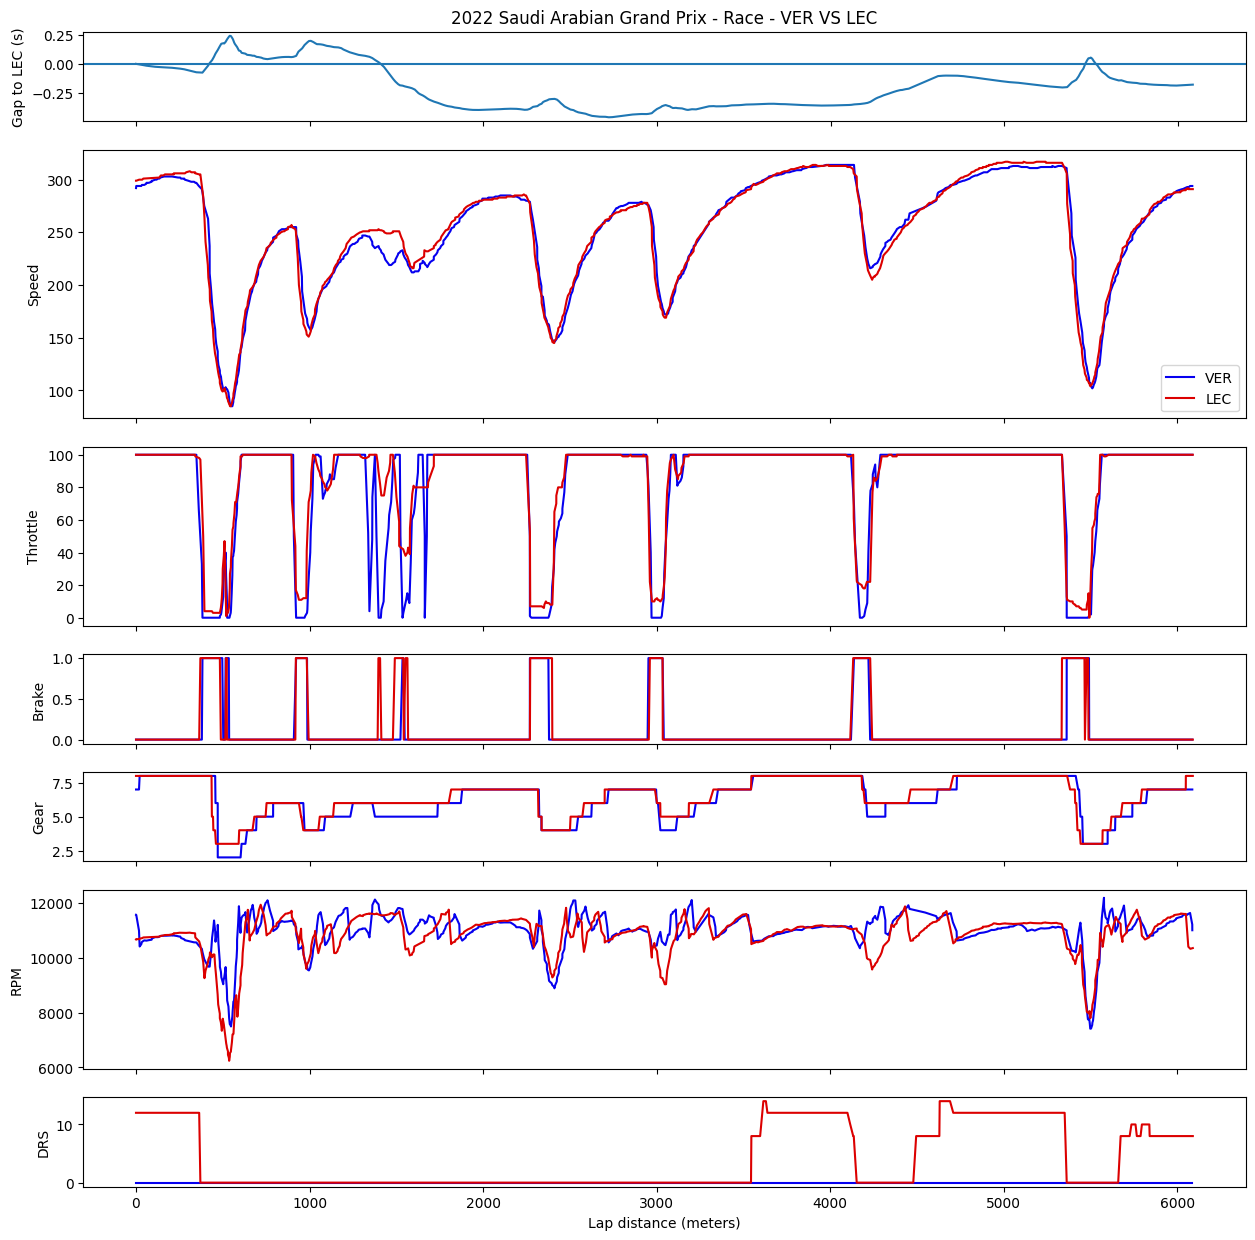

In [44]:

plt.rcParams['figure.figsize'] = plot_size

fig, ax = plt.subplots(7, 1,gridspec_kw={'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)

ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

ax[1].plot(tele_ver['Distance'], tele_ver['Speed'], label=driver_1, color=ff1.plotting.team_color(ver_driver))
ax[1].plot(tele_lec['Distance'], tele_lec['Speed'], label=driver_2, color=ff1.plotting.team_color(lec_driver))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(tele_ver['Distance'], tele_ver['Throttle'], label=driver_1, color=ff1.plotting.team_color(ver_driver))
ax[2].plot(tele_lec['Distance'], tele_lec['Throttle'], label=driver_2, color=ff1.plotting.team_color(lec_driver))
ax[2].set(ylabel='Throttle')

# Brake trace
ax[3].plot(tele_ver['Distance'], tele_ver['Brake'], label=driver_1, color=ff1.plotting.team_color(ver_driver))
ax[3].plot(tele_lec['Distance'], tele_lec['Brake'], label=driver_2, color=ff1.plotting.team_color(lec_driver))
ax[3].set(ylabel='Brake')

# Gear trace
ax[4].plot(tele_ver['Distance'], tele_ver['nGear'], label=driver_1, color=ff1.plotting.team_color(ver_driver))
ax[4].plot(tele_lec['Distance'], tele_lec['nGear'], label=driver_2, color=ff1.plotting.team_color(lec_driver))
ax[4].set(ylabel='Gear')

# RPM trace
ax[5].plot(tele_ver['Distance'], tele_ver['RPM'], label=driver_1, color=ff1.plotting.team_color(ver_driver))
ax[5].plot(tele_lec['Distance'], tele_lec['RPM'], label=driver_2, color=ff1.plotting.team_color(lec_driver))
ax[5].set(ylabel='RPM')

# DRS trace
ax[6].plot(tele_ver['Distance'], tele_ver['DRS'], label=driver_1, color=ff1.plotting.team_color(ver_driver))
ax[6].plot(tele_lec['Distance'], tele_lec['DRS'], label=driver_2, color=ff1.plotting.team_color(lec_driver))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
# Store figure
plt.savefig(plot_filename, dpi=300)
plt.show()